In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 150)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

## Store 7 Model

In [99]:
df = pd.read_csv('/Users/keon/Desktop/walmart2/dtxwalmart/preprocessing_and_filtering/processed_data.csv')
df.drop(columns=['State', 'Completed Date', 'Latitude', 'Longitude'], inplace=True)
df = df.dropna()
df.head()

,Location ID,Tonnage,Days Since Last Pickup,Last Pickup Tonnage,Second Last Pickup Tonnage,Third Last Pickup Tonnage,Weekdays Since Last Pickup,Weekend Days Since Last Pickup,Days Before Last Pickup,Days Before Second Last Pickup,Days Before Third Last Pickup,Month
4,1,6.69,10.0,5.61,5.32,9.15,6.0,6.0,7.0,11.0,3.0,3
5,1,5.86,9.0,6.69,5.61,5.32,7.0,3.0,10.0,7.0,11.0,3
6,1,7.59,12.0,5.86,6.69,5.61,8.0,6.0,9.0,10.0,7.0,3
7,1,4.76,7.0,7.59,5.86,6.69,5.0,3.0,12.0,9.0,10.0,4
8,1,6.97,9.0,4.76,7.59,5.86,7.0,3.0,7.0,12.0,9.0,4


In [100]:
store_7 = df[df['Location ID'] == 7]
store_7.drop(columns=['Location ID'])
store_7.head()
store_7.shape

(108, 12)

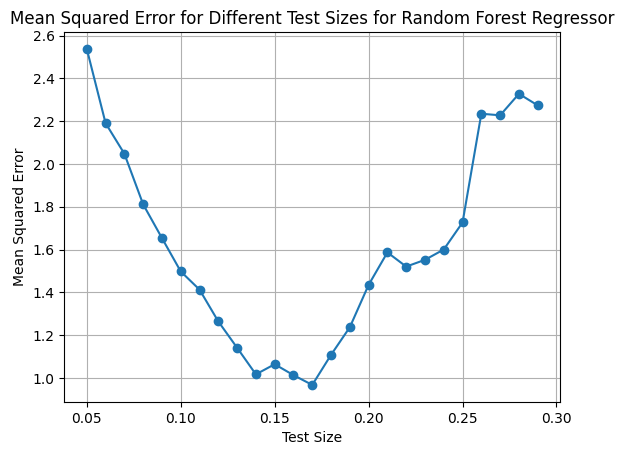

In [108]:
# dropping Days Since Last Pickup because weekdays since last pickup and weekend days since last pickup sum to form it
X = store_7.drop(columns=['Tonnage', 'Days Since Last Pickup'])
y = store_7['Tonnage']

random_forest_model = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=4, random_state=0)

# testing to see which train/test split is optimal
test_sizes = []
mses = []

for i in range(5, 30):
    test_size = i / 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    test_sizes.append(test_size)
    mses.append(mse)
    
# plotting train/test split vs mse
plt.plot(test_sizes, mses, marker='o')
plt.title('Mean Squared Error for Different Test Sizes for Random Forest Regressor')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

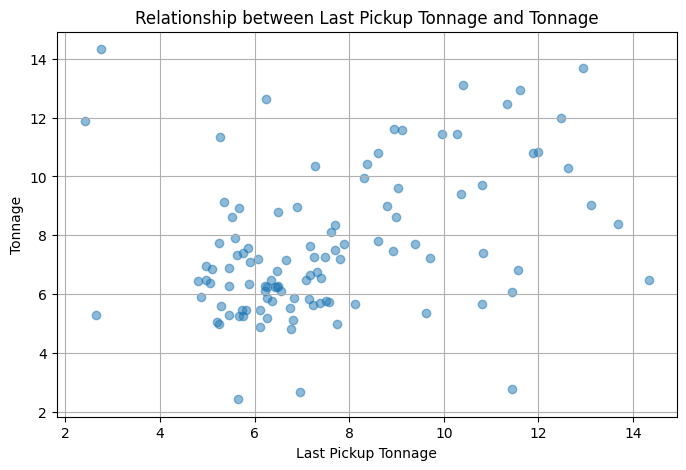

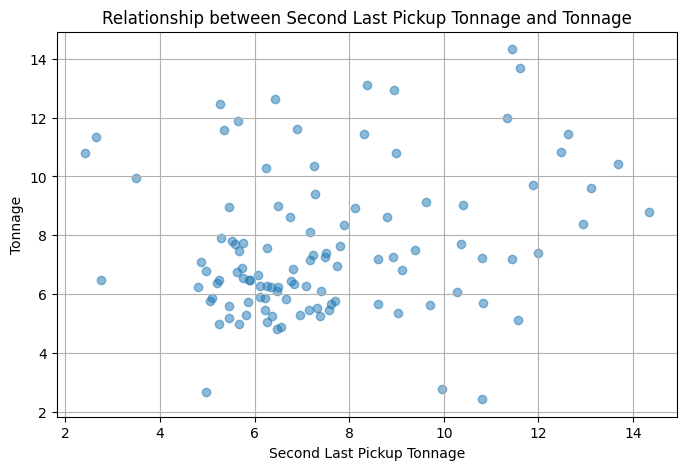

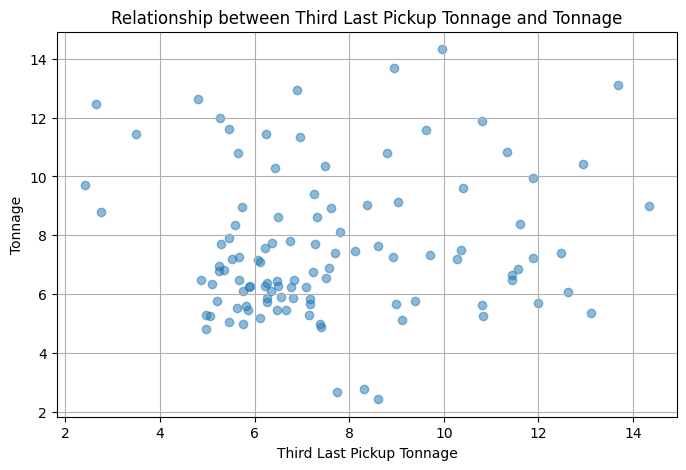

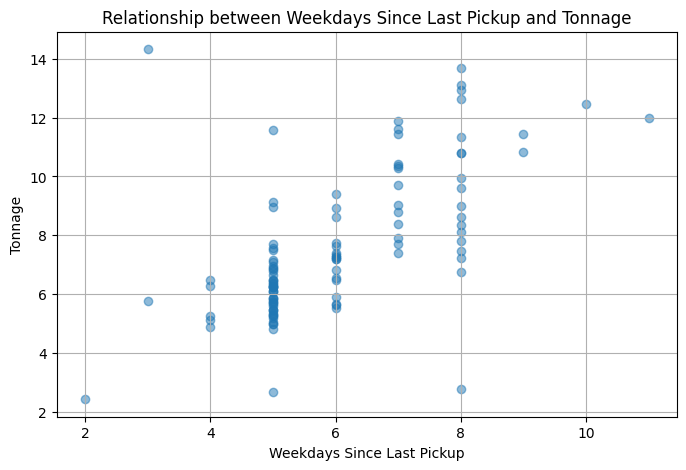

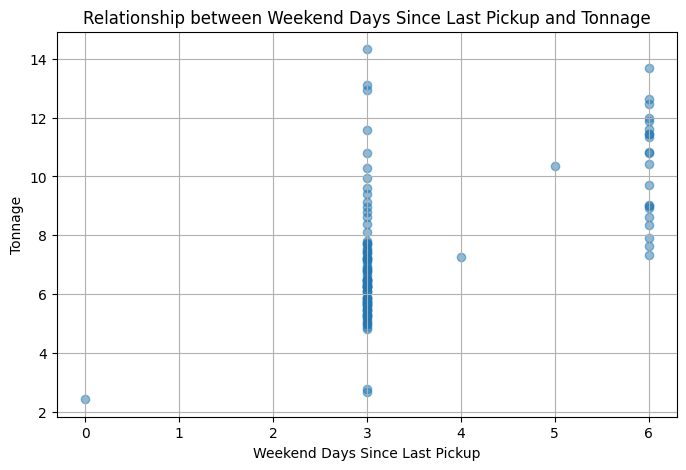

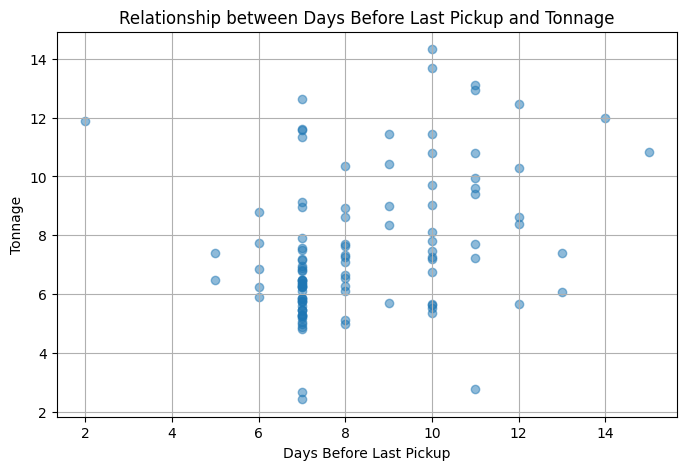

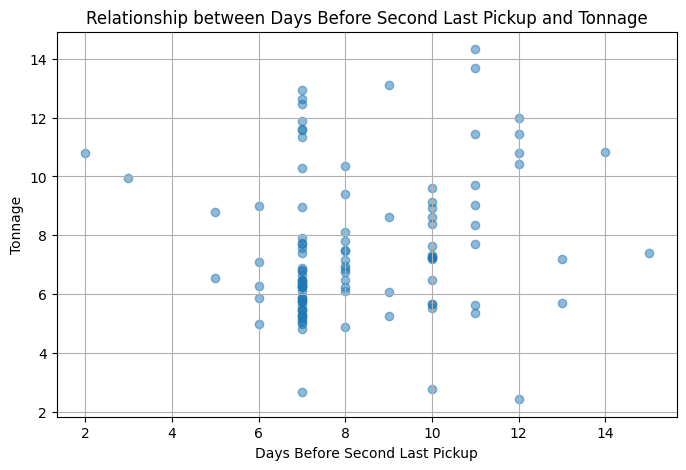

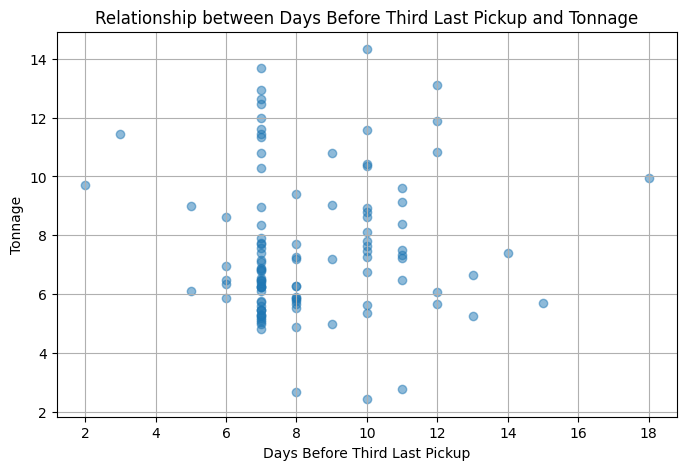

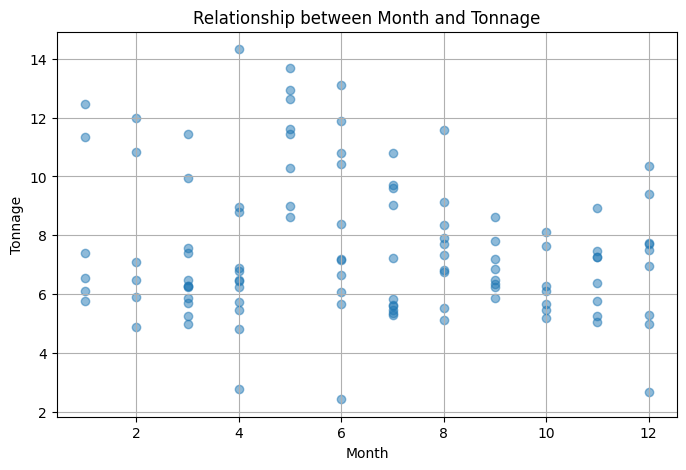

In [103]:
# Extracting the features from the dataframe
features = ['Last Pickup Tonnage', 'Second Last Pickup Tonnage', 'Third Last Pickup Tonnage',
            'Weekdays Since Last Pickup', 'Weekend Days Since Last Pickup', 'Days Before Last Pickup', 
            'Days Before Second Last Pickup', 'Days Before Third Last Pickup', 'Month']

# Plotting each feature against the Tonnage
for feature in features:
    plt.figure(figsize=(8, 5))
    plt.scatter(X[feature], y, alpha=0.5)
    plt.title(f'Relationship between {feature} and Tonnage')
    plt.xlabel(feature)
    plt.ylabel('Tonnage')
    plt.grid(True)
    plt.show()


In [ ]:
# test a bunch of different model types, choose 1 thats the best to do hyperparamter tuning on

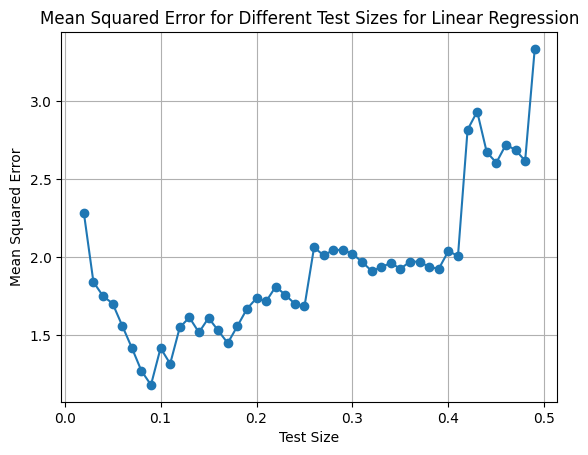

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

test_sizes = []
mses = []

for i in range(2, 50):
    test_size = i / 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    linear_model.fit(X_train, y_train)
    linear_pred = linear_model.predict(X_test)
    linear_mse = mean_squared_error(y_test, linear_pred)
    test_sizes.append(test_size)
    mses.append(linear_mse)
    
plt.plot(test_sizes, mses, marker='o')
plt.title('Mean Squared Error for Different Test Sizes for Linear Regression')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

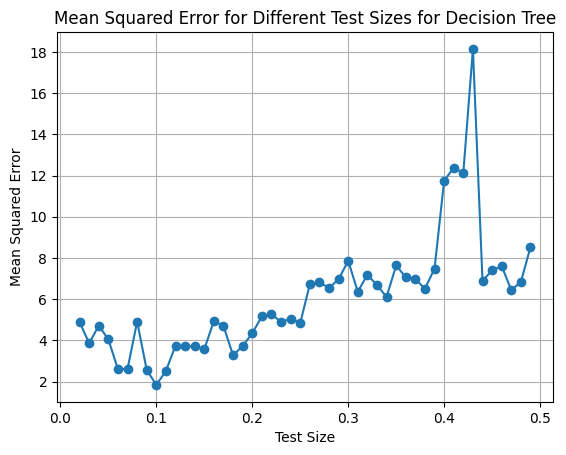

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=0)

test_sizes = []
mses = []

for i in range(2, 50):
    test_size = i / 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)
    dt_mse = mean_squared_error(y_test, dt_pred)
    test_sizes.append(test_size)
    mses.append(dt_mse)
    
plt.plot(test_sizes, mses, marker='o')
plt.title('Mean Squared Error for Different Test Sizes for Decision Tree')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

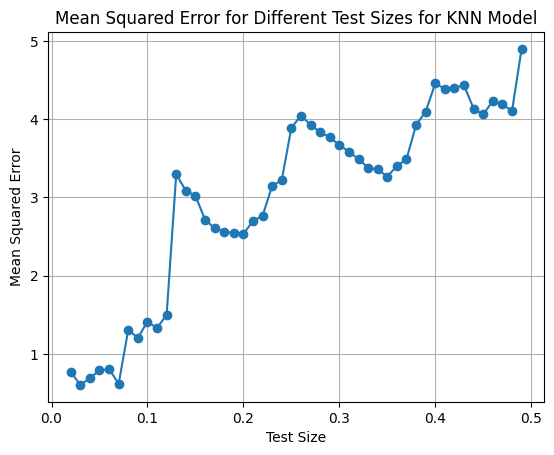

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

test_sizes = []
mses = []

for i in range(2, 50):
    test_size = i / 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    knn_mse = mean_squared_error(y_test, knn_pred)
    test_sizes.append(test_size)
    mses.append(knn_mse)
    
plt.plot(test_sizes, mses, marker='o')
plt.title('Mean Squared Error for Different Test Sizes for KNN Model')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

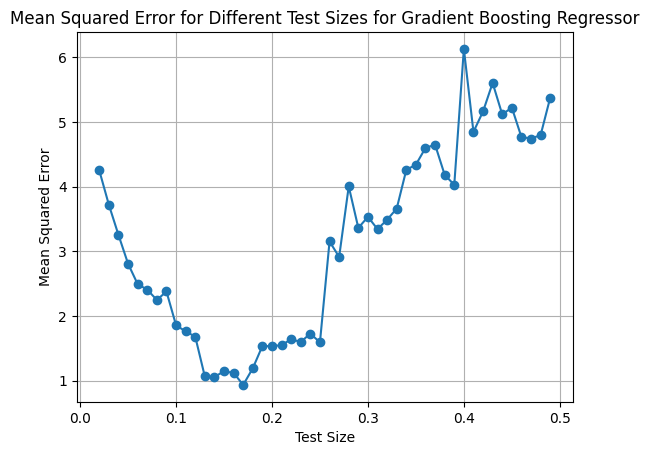

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=0)

test_sizes = []
mses = []

for i in range(2, 50):
    test_size = i / 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)
    gb_mse = mean_squared_error(y_test, gb_pred)
    test_sizes.append(test_size)
    mses.append(gb_mse)
    
plt.plot(test_sizes, mses, marker='o')
plt.title('Mean Squared Error for Different Test Sizes for Gradient Boosting Regressor')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

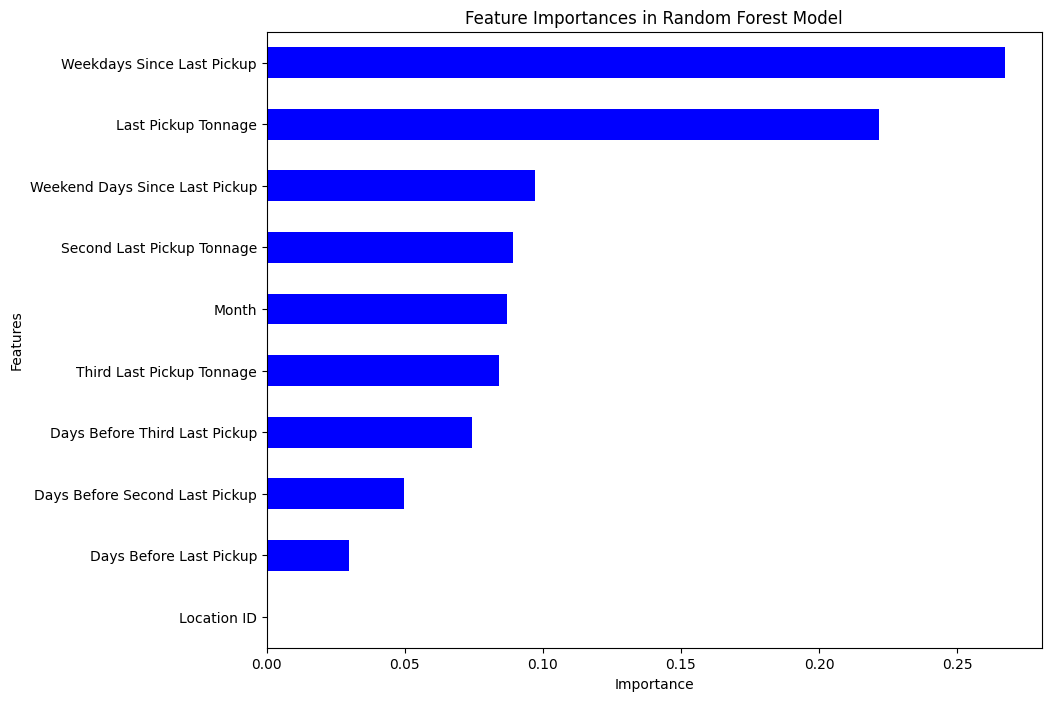

In [ ]:
# Get feature importances from the model
feature_importances = random_forest_model.feature_importances_

# Get feature names
feature_names = X.columns

# Create a series to store the importances and labels for better visualization
importances = pd.Series(data=feature_importances, index=feature_names)

# Sort the features by importance
importances_sorted = importances.sort_values()

# Plot
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='blue')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [107]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
